# Corpus thèse
Léa Maronet

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
corpus = pd.read_csv("Corpus.csv")
corpus

,Titre,Etat,Site,Sujet,Motifs,Date,Support,Lieu de conservation,Auteur,Citation bibliographique,Droit d'auteur
0,ASOK_AMA001,Andhra Pradesh,Amarāvatī,Balustrade avec médaillons lotiformes,lotus,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,British Museum,Maronet Léa,NaN,NaN
1,ASOK_AMA002,Andhra Pradesh,Amarāvatī,Pilier de balustrade avec médaillons lotiforme...,lotus,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,British Museum,Maronet Léa,NaN,NaN
2,ASOK_AMA003,Andhra Pradesh,Amarāvatī,Pilier de balustrade avec médaillons lotiforme...,lotus ; éléphant,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,British Museum,Maronet Léa,NaN,NaN
3,ASOK_AMA004,Andhra Pradesh,Amarāvatī,Pilier de balustrade avec médaillons lotiforme...,lotus,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,British Museum,Maronet Léa,NaN,NaN
4,ASOK_AMA005,Andhra Pradesh,Amarāvatī,Pilier de balustrade avec médaillons lotiforme...,lotus,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,British Museum,Maronet Léa,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122,ASOK_BODA054,Bihar,Bodhgayā,Médaillon lotiforme et éléphant ailé,lotus ; éléphant,3 B.C. ; 2 B.C. ; 1 B.C.,Stūpa ; balustrade ; pilier,Mahābodhi temple complex,Huntington Susan ; Hungtington John,DSAL,NaN
123,ASOK_BODA055,Bihar,Bodhgayā,Demi-médaillon lotiforme,lotus,3 B.C. ; 2 B.C. ; 1 B.C.,Stūpa ; balustrade ; pilier,Mahābodhi temple complex,Huntington Susan ; Hungtington John,DSAL,NaN
124,ASOK_BODA056,Bihar,Bodhgayā,Médaillon lotiforme,lotus,3 B.C. ; 2 B.C. ; 1 B.C.,Stūpa ; balustrade ; pilier,Mahābodhi temple complex,Huntington Susan ; Hungtington John,DSAL,NaN
125,ASOK_BODA057,Bihar,Bodhgayā,Demi-médaillon lotiforme,lotus,3 B.C. ; 2 B.C. ; 1 B.C.,Stūpa ; balustrade ; pilier,Mahābodhi temple complex,Huntington Susan ; Hungtington John,DSAL,NaN


## Répartition par sites

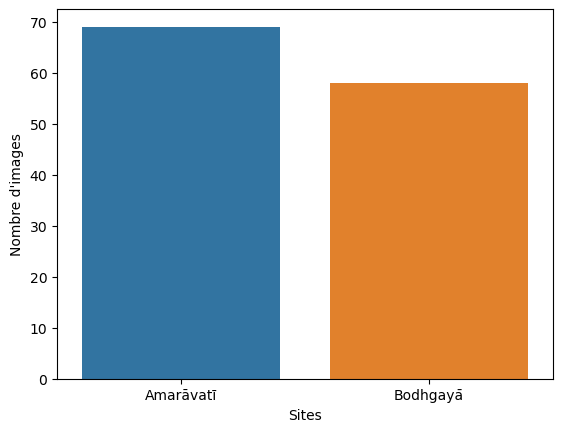

In [3]:
sns.countplot(corpus, x="Site")
plt.ylabel("Nombre d'images")
plt.xlabel("Sites")
plt.show()

## Répartition par dates

### Par grandes périodes

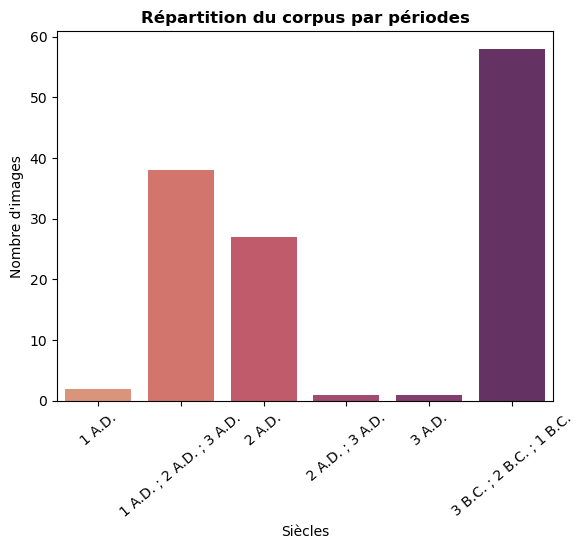

In [4]:
dates = corpus.groupby('Date')['Titre'].count()
dates = dates.reset_index()
sns.barplot(y=dates['Titre'], x=dates['Date'], palette="flare")
plt.ylabel("Nombre d'images")
plt.xlabel("Siècles")
plt.xticks(rotation=40)
plt.title("Répartition du corpus par périodes", fontweight="bold")
plt.show()

In [5]:
dates = dates.rename(columns={'Titre' : 'Occurences'})
dates

,Date,Occurences
0,1 A.D.,2
1,1 A.D. ; 2 A.D. ; 3 A.D.,38
2,2 A.D.,27
3,2 A.D. ; 3 A.D.,1
4,3 A.D.,1
5,3 B.C. ; 2 B.C. ; 1 B.C.,58


### Par siècles

In [6]:
#Calcul des occurences
siecles = pd.DataFrame(corpus.Date.str.replace(" ", "").str.split(";").explode().value_counts())
siecles = siecles.reset_index()
siecles = siecles.rename(columns={'count' : 'Occurences'})
siecles

,Date,Occurences
0,2A.D.,66
1,3B.C.,58
2,2B.C.,58
3,1B.C.,58
4,1A.D.,40
5,3A.D.,40


In [7]:
#Tri des siècles par ordre chronologique
conditions = []
valeurs = []

for i,j in enumerate(['3B.C.','2B.C.','1B.C.','1A.D.', '2A.D.', '3A.D.']):
    conditions.append((siecles['Date'] == j))
    valeurs.append(i)

siecles['Tri'] = np.select(conditions, valeurs)
siecles.sort_values(by='Tri',inplace = True)
siecles.drop(columns="Tri")

,Date,Occurences
1,3B.C.,58
2,2B.C.,58
3,1B.C.,58
4,1A.D.,40
0,2A.D.,66
5,3A.D.,40


Text(0.5, 1.0, 'Répartition du corpus par siècles')

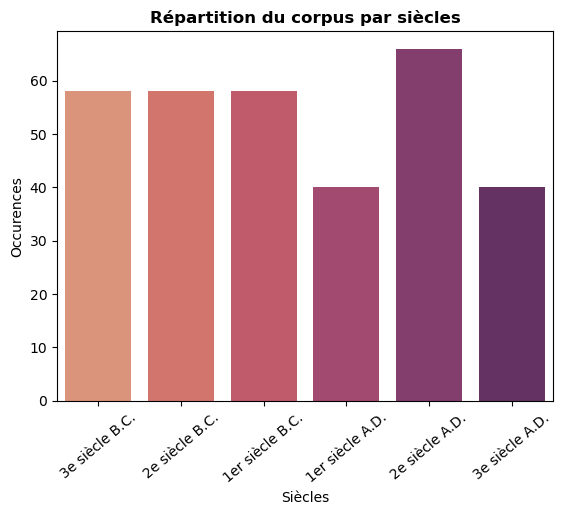

In [8]:
#Création du graphique
noms_siecles = ["3e siècle B.C.", "2e siècle B.C.", "1er siècle B.C.", "1er siècle A.D.", "2e siècle A.D.", "3e siècle A.D."]
sns.barplot(y=siecles['Occurences'], x=siecles['Date'], palette="flare").set(xlabel="Siècles", xticklabels=noms_siecles)
plt.xticks(rotation=40)
plt.title("Répartition du corpus par siècles", fontweight="bold")

## Occurence des motifs

### Dans l'ensemble du corpus

In [9]:
motifs = pd.DataFrame(corpus.Motifs.str.replace(" ", "").str.split(";").explode().value_counts())
motifs = motifs.reset_index()
motifs = motifs.rename(columns={'count' : 'Occurences'})
motifs

,Motifs,Occurences
0,lotus,125
1,lion,11
2,éléphant,8
3,oiseau,7
4,cheval,5
5,taureau,2


Text(0.5, 1.0, 'Répartition des motifs au sein du corpus')

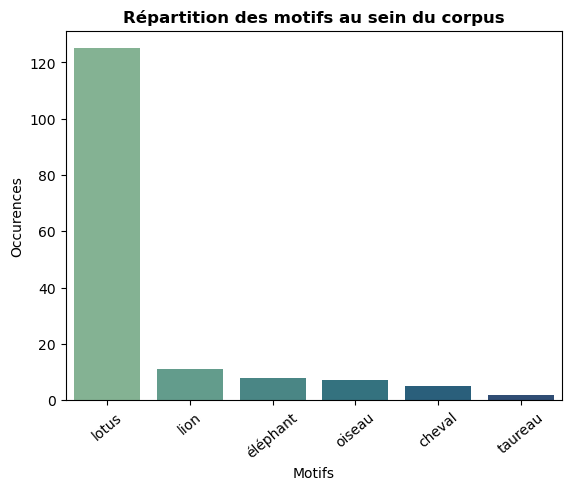

In [10]:
sns.barplot(y=motifs['Occurences'], x=motifs['Motifs'], palette="crest")
plt.xticks(rotation=40)
plt.title("Répartition des motifs au sein du corpus", fontweight="bold")

### Par site

In [11]:
#Récupération des noms des sites
noms_sites = list(corpus.Site.unique())
noms_sites

['Amarāvatī', 'Bodhgayā']

In [22]:
#Création d'un dataframe avec le nombre de motifs par site

motifs_sites = pd.DataFrame()

for site in noms_sites:
    motifs_sites[site] = corpus.loc[corpus["Site"] == site].Motifs.str.replace(" ", "").str.split(";").explode().value_counts()

motifs_sites.reset_index(inplace=True)
motifs_sites

,Motifs,Amarāvatī,Bodhgayā
0,lotus,67,58
1,lion,10,1
2,éléphant,6,2
3,oiseau,6,1
4,cheval,2,3
5,taureau,1,1


In [23]:
#Réarrangement du dataframe
motifs_sites = motifs_sites.melt(id_vars="Motifs")

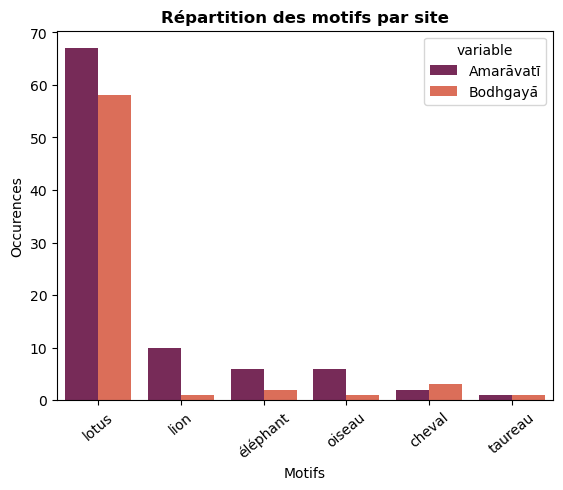

In [24]:
sns.barplot(data=motifs_sites, x='Motifs', y='value', hue='variable', errorbar=None, palette="rocket")
plt.xticks(rotation=40)
plt.ylabel("Occurences")
plt.title("Répartition des motifs par site", fontweight="bold")
plt.show()